In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns

print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("matplotlib:", mpl.__version__)
print("seaborn:", sns.__version__)


pandas: 2.2.2
numpy: 2.0.2
matplotlib: 3.10.0
seaborn: 0.13.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob   # if you plan to use sentiment
import spacy                     # if you plan NER later

# Set some nice defaults
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (8, 5)


In [ ]:
import tensorflow as tf
tf.test.is_gpu_available()
# or in new TF:
# tf.config.list_physical_devices('GPU')


Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
import pandas as pd
excel_path = "/content/drive/My Drive/Colab Notebooks/behaviour_simulation_train.xlsx"
df = pd.read_excel(excel_path)
print("Shape:", df.shape)
df.head()



Shape: (300000, 7)


,id,date,likes,content,username,media,inferred company
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons
1,2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent
2,3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc
3,4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams
4,5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent


In [ ]:
!ls "/content/drive/My Drive"


ls: cannot access '/content/drive/My Drive': No such file or directory


In [ ]:
!ls /content


drive  sample_data


In [ ]:
!ls /content

drive  sample_data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls /content


drive  sample_data


In [ ]:
!ls /content/drive


MyDrive


In [ ]:
!ls "/content/drive/MyDrive"


'Colab Notebooks'		       'Stalwarts final allocs.xlsx'
'L06 Network Theorems U.ppsx'	        untitled7aug2024922pm_aVq7PcGi.m4a
'List of Course Requests (24) 3.xlsx'


In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks"


behaviour_simulation_train.xlsx
Divyam_Awasthy_Week1_EDA_and_Feature_Planning.ipynb


In [ ]:
import pandas as pd

excel_path = "/content/drive/MyDrive/Colab Notebooks/behaviour_simulation_train.xlsx"
df = pd.read_excel(excel_path)

print("Shape:", df.shape)
df.head()



Shape: (300000, 7)


,id,date,likes,content,username,media,inferred company
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons
1,2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent
2,3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc
3,4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams
4,5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent


In [ ]:
# Drop rows where any of content, username, company, or likes is null
df.dropna(subset=['content', 'username', 'company', 'likes'], inplace=True)


KeyError: ['company']

In [ ]:
# 1) Show all column names
print(df.columns.tolist())

# 2) Peek at the first few rows, so you can see exactly what each column contains
df.head()


['id', 'date', 'likes', 'content', 'username', 'media', 'inferred company']


,id,date,likes,content,username,media,inferred company
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons
1,2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent
2,3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc
3,4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams
4,5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent


In [ ]:
# Rename the column for simplicity
df.rename(columns={'inferred company': 'company'}, inplace=True)

# Verify the rename
print(df.columns.tolist())
df.head(3)


['id', 'date', 'likes', 'content', 'username', 'media', 'company']


,id,date,likes,content,username,media,company
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons
1,2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent
2,3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc


In [ ]:
# Drop rows where any of content, username, company, or likes is null
df.dropna(subset=['content', 'username', 'company', 'likes'], inplace=True)

# Check how many rows remain
print("Rows after dropna:", df.shape[0])


Rows after dropna: 300000


In [ ]:
# Replace NaN in 'media' with 'no_media'
df['media'].fillna('no_media', inplace=True)

# Create a boolean flag for "has_media"
df['has_media'] = df['media'].apply(lambda x: x != 'no_media')

# Quick check
print(df[['media', 'has_media']].head(5))
print("Counts of has_media:\n", df['has_media'].value_counts())


<ipython-input-15-b1fcb6cf85ab>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['media'].fillna('no_media', inplace=True)


                                               media  has_media
0  [Photo(previewUrl='https://pbs.twimg.com/media...       True
1  [Photo(previewUrl='https://pbs.twimg.com/media...       True
2  [Photo(previewUrl='https://pbs.twimg.com/media...       True
3  [Photo(previewUrl='https://pbs.twimg.com/media...       True
4  [Photo(previewUrl='https://pbs.twimg.com/media...       True
Counts of has_media:
 has_media
True    300000
Name: count, dtype: int64


In [ ]:
# Ensure every content value is a string, strip whitespace, and lowercase it
df['content'] = df['content'].astype(str).str.strip().str.lower()

# Peek at the first few rows
df['content'].head()


,content
0,"spend your weekend morning with a ham, egg, an..."
1,watch rapper <mention> freestyle for over an h...
2,canadian armenian community demands ban on mil...
3,"1st in europe to be devastated by covid-19, it..."
4,congratulations to pauletha butts of <mention>...


In [ ]:
df['datetime'] = pd.to_datetime(df['date'], errors='coerce')

# Check how many failed to parse:
print("Unparseable dates (NaT):", df['datetime'].isnull().sum())

# (Optional) Drop rows where datetime is NaT:
df.dropna(subset=['datetime'], inplace=True)
print("Rows after dropping NaT datetime:", df.shape[0])


Unparseable dates (NaT): 0
Rows after dropping NaT datetime: 300000


In [ ]:
print(df[['content', 'username', 'company', 'likes', 'media', 'datetime']].isnull().sum())


content     0
username    0
company     0
likes       0
media       0
datetime    0
dtype: int64


In [ ]:
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()


In [ ]:
df['word_count'] = df['content'].apply(lambda x: len(x.split()))
df['char_count'] = df['content'].apply(len)


In [ ]:
# Extract hour (0–23) and day name from the datetime
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.day_name()

# Quick check
df[['datetime','hour','day_of_week']].head(5)


,datetime,hour,day_of_week
0,2020-12-12 00:47:00,0,Saturday
1,2018-06-30 10:04:20,10,Saturday
2,2020-09-29 19:47:28,19,Tuesday
3,2020-10-01 11:40:09,11,Thursday
4,2018-10-19 14:30:46,14,Friday


In [ ]:
# Word count = number of tokens in content
df['word_count'] = df['content'].apply(lambda x: len(x.split()))

# Character count = length of the string
df['char_count'] = df['content'].apply(len)

# Quick check
df[['content','word_count','char_count']].head(5)


,content,word_count,char_count
0,"spend your weekend morning with a ham, egg, an...",29,181
1,watch rapper <mention> freestyle for over an h...,10,73
2,canadian armenian community demands ban on mil...,14,104
3,"1st in europe to be devastated by covid-19, it...",22,140
4,congratulations to pauletha butts of <mention>...,26,199


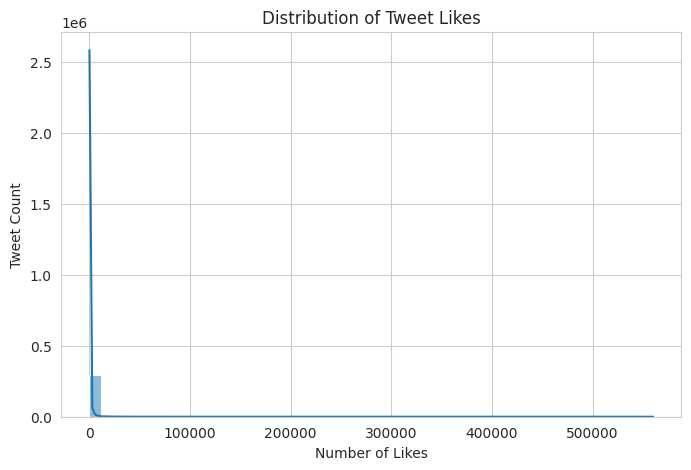

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df['likes'], kde=True, bins=50)
plt.title("Distribution of Tweet Likes")
plt.xlabel("Number of Likes")
plt.ylabel("Tweet Count")
plt.show()


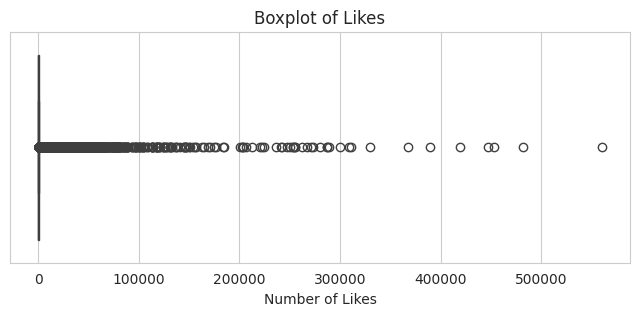

In [ ]:
plt.figure(figsize=(8,3))
sns.boxplot(x=df['likes'])
plt.title("Boxplot of Likes")
plt.xlabel("Number of Likes")
plt.show()


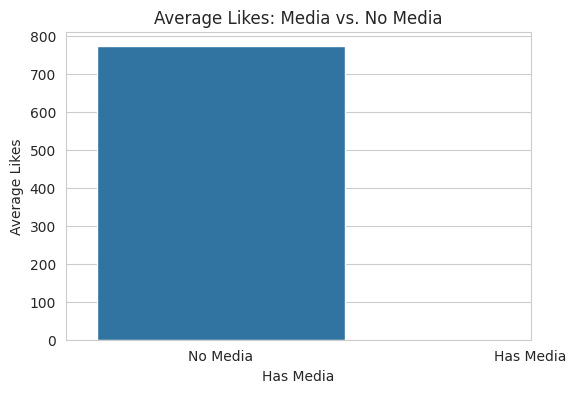

In [ ]:
media_likes = df.groupby('has_media')['likes'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(x='has_media', y='likes', data=media_likes)
plt.title("Average Likes: Media vs. No Media")
plt.xlabel("Has Media")
plt.ylabel("Average Likes")
plt.xticks([0,1], ['No Media', 'Has Media'])
plt.show()


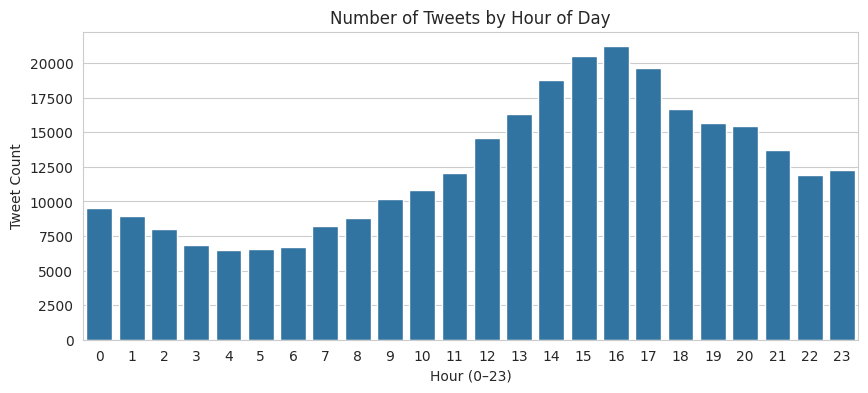

In [ ]:
plt.figure(figsize=(10,4))
sns.countplot(x='hour', data=df)
plt.title("Number of Tweets by Hour of Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Tweet Count")
plt.show()


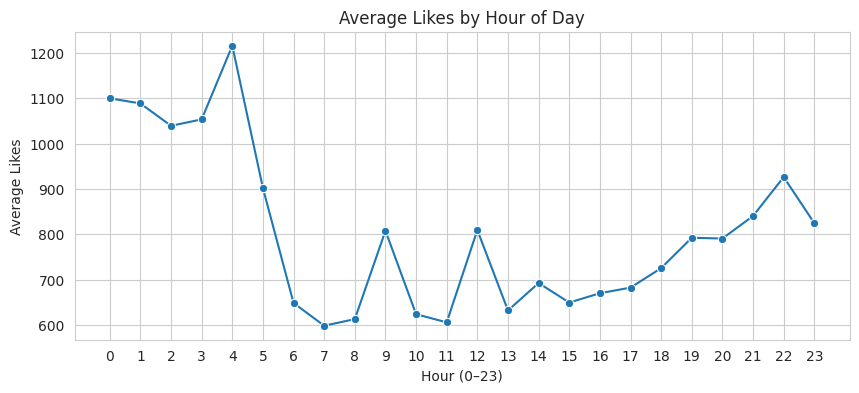

In [ ]:
avg_likes_hour = df.groupby('hour')['likes'].mean().reset_index()

plt.figure(figsize=(10,4))
sns.lineplot(x='hour', y='likes', data=avg_likes_hour, marker='o')
plt.title("Average Likes by Hour of Day")
plt.xlabel("Hour (0–23)")
plt.ylabel("Average Likes")
plt.xticks(range(0,24))
plt.show()


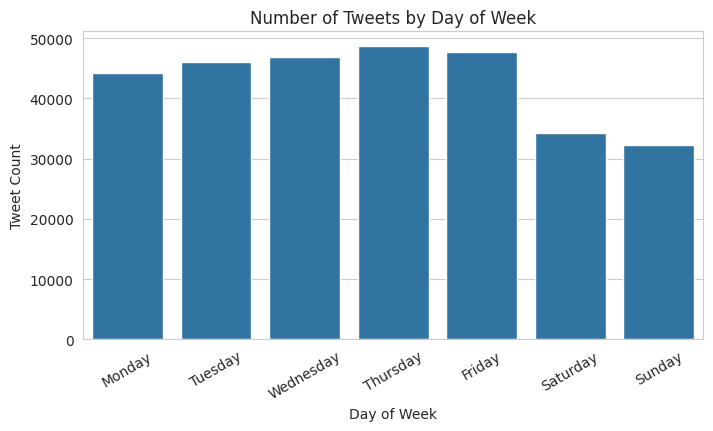

In [ ]:
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

plt.figure(figsize=(8,4))
sns.countplot(x='day_of_week', data=df, order=order)
plt.title("Number of Tweets by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Tweet Count")
plt.xticks(rotation=30)
plt.show()


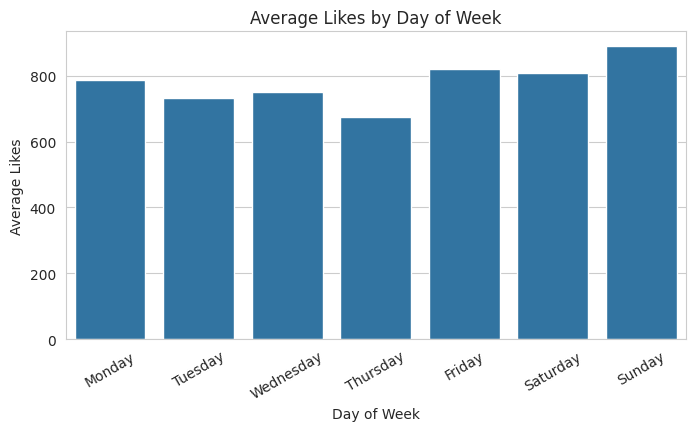

In [ ]:
avg_likes_day = df.groupby('day_of_week')['likes'].mean().loc[order].reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x='day_of_week', y='likes', data=avg_likes_day, order=order)
plt.title("Average Likes by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Likes")
plt.xticks(rotation=30)
plt.show()


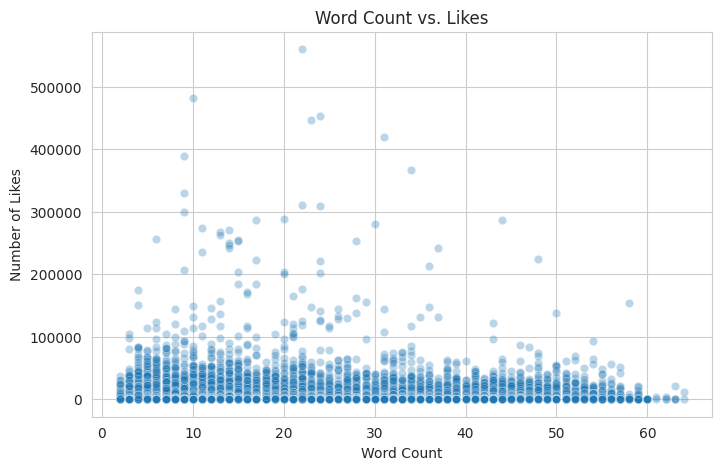

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='word_count', y='likes', data=df, alpha=0.3)
plt.title("Word Count vs. Likes")
plt.xlabel("Word Count")
plt.ylabel("Number of Likes")
plt.show()


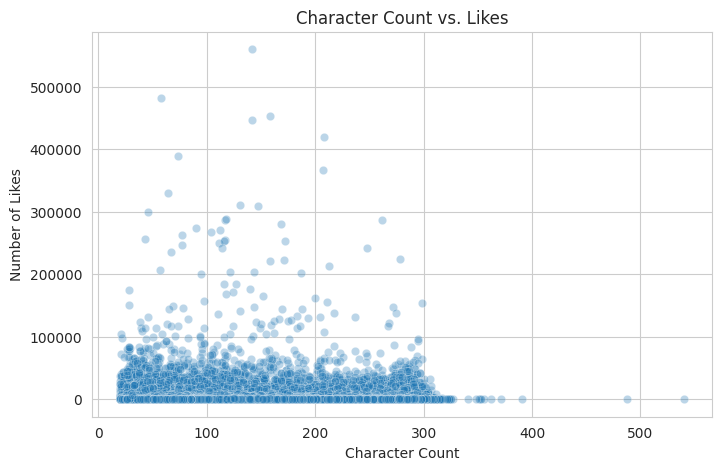

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='char_count', y='likes', data=df, alpha=0.3)
plt.title("Character Count vs. Likes")
plt.xlabel("Character Count")
plt.ylabel("Number of Likes")
plt.show()


In [ ]:
df[['likes','word_count','char_count']].corr()


,likes,word_count,char_count
likes,1.000000,-0.003997,-0.015755
word_count,-0.003997,1.000000,0.971636
char_count,-0.015755,0.971636,1.000000


In [ ]:
feature_plan = pd.DataFrame({
    'Raw Column': ['content', 'media', 'date', 'username', 'company'],
    'Derived Feature(s)': [
        'word_count, char_count, (later: sentiment)',
        'has_media',
        'hour, day_of_week',
        'username (consider one-hot or embedding later)',
        'company (consider one-hot or embedding later)'
    ],
    'Notes': [
        'Cleaned (lowercased, stripped); count tokens; future sentiment with TextBlob',
        'Boolean flag; True if any media URL present',
        'Extract hour and day_name from datetime',
        'Potential categorical feature; watch for high cardinality',
        'Likely important brand signal; encode appropriately'
    ]
})

feature_plan


,Raw Column,Derived Feature(s),Notes
0,content,"word_count, char_count, (later: sentiment)","Cleaned (lowercased, stripped); count tokens; ..."
1,media,has_media,Boolean flag; True if any media URL present
2,date,"hour, day_of_week",Extract hour and day_name from datetime
3,username,username (consider one-hot or embedding later),Potential categorical feature; watch for high ...
4,company,company (consider one-hot or embedding later),Likely important brand signal; encode appropri...


In [ ]:
{
  "content": "just launched our new product!",
  "media_url": "https://example.com/image.jpg",
  "company": "BrandX",
  "username": "BrandXOfficial",
  "timestamp": "2025-05-10T14:23:00Z"
}


{'content': 'just launched our new product!',
 'media_url': 'https://example.com/image.jpg',
 'company': 'BrandX',
 'username': 'BrandXOfficial',
 'timestamp': '2025-05-10T14:23:00Z'}

In [ ]:
{
  "predicted_likes": 87,
  "sentiment_polarity": 0.42
}


{'predicted_likes': 87, 'sentiment_polarity': 0.42}

In [3]:
# 2.1 Install git (Colab usually has it, but this ensures it’s available)
!apt-get install git -qq

# 2.2 Configure your Git identity (replace with your email/name)
!git config --global user.email "ms1240541@mse.iitd.ac.in"
!git config --global user.name "Divyam Awasthy"


Cloning into '/content/CAIC_Summer_Of_Tech_25'...
remote: Enumerating objects: 391, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 391 (delta 100), reused 69 (delta 69), pack-reused 269 (from 2)
Receiving objects: 100% (391/391), 504.33 KiB | 14.01 MiB/s, done.
Resolving deltas: 100% (127/127), done.
/content/CAIC_Summer_Of_Tech_25


In [4]:
!ls /content


drive  sample_data


In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks"


behaviour_simulation_train.xlsx
Divyam_Awasthy_Week1_EDA_and_Feature_Planning.ipynb


In [ ]:
!mv "/content/drive/MyDrive/Colab Notebooks/Divyam_Awasthy_Week1_EDA_and_Feature_Planning.ipynb" \
     "/content/CAIC_Summer_Of_Tech_25/"


In [ ]:
%cd /content/CAIC_Summer_Of_Tech_25

# Stage the notebook
!git add Divyam_Awasthy_Week1_EDA_and_Feature_Planning.ipynb

# Commit
!git commit -m "Add Week 1 EDA notebook"

# Push to GitHub
!git push origin main


/content/CAIC_Summer_Of_Tech_25
[main 213a5cf] Add Week 1 EDA notebook
 1 file changed, 1 insertion(+)
 create mode 100644 Divyam_Awasthy_Week1_EDA_and_Feature_Planning.ipynb
Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 315.87 KiB | 11.28 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
remote: error: GH013: Repository rule violations found for refs/heads/main.
remote: 
remote: - GITHUB PUSH PROTECTION
remote:   —————————————————————————————————————————
remote:     Resolve the following violations before pushing again
remote: 
remote:     - Push cannot contain secrets
remote: 
remote:     
remote:      (?) Learn how to resolve a blocked push
remote:      https://docs.github.com/code-security/secret-scanning/working-with-secret-scanning-and-push-protection/working-with-push-p

In [ ]:
%cd /content/CAIC_Summer_Of_Tech_25

# This moves HEAD back one commit, leaving the notebook file in the working directory (unstaged).
!git reset HEAD~1


/content/CAIC_Summer_Of_Tech_25


In [ ]:
%cd /content/CAIC_Summer_Of_Tech_25

# Stage the now‐clean notebook
!git add Divyam_Awasthy_Week1_EDA_and_Feature_Planning.ipynb

# Commit with a message
!git commit -m "Add Week 1 EDA notebook (PAT removed)"


/content/CAIC_Summer_Of_Tech_25
[main 950ac4b] Add Week 1 EDA notebook (PAT removed)
 1 file changed, 1 insertion(+)
 create mode 100644 Divyam_Awasthy_Week1_EDA_and_Feature_Planning.ipynb


In [ ]:
# Push to the 'main' branch on GitHub
!git push -u origin main


Enumerating objects: 4, done.
Counting objects: 100% (4/4), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 315.88 KiB | 8.77 MiB/s, done.
Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (1/1), completed with 1 local object.
remote: error: GH013: Repository rule violations found for refs/heads/main.
remote: 
remote: - GITHUB PUSH PROTECTION
remote:   —————————————————————————————————————————
remote:     Resolve the following violations before pushing again
remote: 
remote:     - Push cannot contain secrets
remote: 
remote:     
remote:      (?) Learn how to resolve a blocked push
remote:      https://docs.github.com/code-security/secret-scanning/working-with-secret-scanning-and-push-protection/working-with-push-protection-from-the-command-line#resolving-a-blocked-push
remote:     
remote:     
remote:       —— GitHub Personal Access Token ——————————————————————
remote:        locations

In [ ]:
%cd /content/CAIC_Summer_Of_Tech_25
!git reset HEAD~1


/content/CAIC_Summer_Of_Tech_25


In [ ]:
%cd /content/CAIC_Summer_Of_Tech_25
!git reset HEAD~1


/content/CAIC_Summer_Of_Tech_25
Unstaged changes after reset:
M	AerialRobotics_AeroClub/README.md


In [2]:
import json

nb_path = "/content/CAIC_Summer_Of_Tech_25/Divyam_Awasthy_Week1_EDA_and_Feature_Planning.ipynb"
with open(nb_path, "r") as f:
    data = json.load(f)

changed = False
for cell in data["cells"]:
    if cell["cell_type"] == "code":
        # Keep only lines that do NOT contain "ghp_"
        new_source = [line for line in cell["source"] if "ghp_" not in line]
        if len(new_source) != len(cell["source"]):
            cell["source"] = new_source
            changed = True

if changed:
    with open(nb_path, "w") as f:
        json.dump(data, f, indent=1)  # overwrite with cleaned JSON
    print("Removed all ghp_ lines from notebook.")
else:
    print("No ghp_ lines found in any code cell.")


FileNotFoundError: [Errno 2] No such file or directory: '/content/CAIC_Summer_Of_Tech_25/Divyam_Awasthy_Week1_EDA_and_Feature_Planning.ipynb'

In [ ]:
!grep -n "ghp_" /content/CAIC_Summer_Of_Tech_25/Divyam_Awasthy_Week1_EDA_and_Feature_Planning.ipynb || echo "No occurrences found"


In [5]:
!find /content -name "*.ipynb"


/content/drive/MyDrive/Colab Notebooks/Divyam_Awasthy_Week1_EDA_and_Feature_Planning.ipynb


In [6]:
%cd /content/CAIC_Summer_Of_Tech_25
!git add Divyam_Awasthy_Week1_EDA_and_Feature_Planning.ipynb
!git commit -m "Add Week 1 EDA notebook"
!git pull origin main --no-rebase
!git push origin main


[Errno 2] No such file or directory: '/content/CAIC_Summer_Of_Tech_25'
/content
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git
fatal: not a git repository (or any of the parent directories): .git


In [7]:
!git clone https://github.com/DivyamAwasthy/CAIC_Summer_Of_Tech_25.git


Cloning into 'CAIC_Summer_Of_Tech_25'...
remote: Enumerating objects: 391, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 391 (delta 100), reused 69 (delta 69), pack-reused 269 (from 2)
Receiving objects: 100% (391/391), 504.33 KiB | 1.05 MiB/s, done.
Resolving deltas: 100% (127/127), done.


In [8]:
%cd /content/CAIC_Summer_Of_Tech_25
!git config user.name "DivyamAwasthy"


!git add Divyam_Awasthy_Week1_EDA_and_Feature_Planning.ipynb
!git commit -m "Add Week 1 EDA notebook"
!git pull origin main --no-rebase
!git push origin main


/content/CAIC_Summer_Of_Tech_25
fatal: pathspec 'Divyam_Awasthy_Week1_EDA_and_Feature_Planning.ipynb' did not match any files
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean
From https://github.com/DivyamAwasthy/CAIC_Summer_Of_Tech_25
 * branch            main       -> FETCH_HEAD
Already up to date.
fatal: could not read Username for 'https://github.com': No such device or address


In [9]:
!ls /content/*.ipynb


ls: cannot access '/content/*.ipynb': No such file or directory


In [10]:
!find /content -name "*.ipynb"


/content/drive/MyDrive/Colab Notebooks/Divyam_Awasthy_Week1_EDA_and_Feature_Planning.ipynb
